In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
#read data
df_public = pd.read_csv('russell_2000_data_new.csv',encoding='latin-1',sep=';')
columns_to_keep = ['ï»¿Ticker', 'Name','Business Section','Delisted']

# Get the columns to drop
columns_to_drop = list(set(df_public.columns) - set(columns_to_keep))

# drop the unwanted columns
df_public.drop(columns_to_drop, axis=1, inplace=True)

df_public = df_public.dropna(subset=['Business Section'])
df_public = df_public.loc[df_public.Delisted != 1]
df_public


,ï»¿Ticker,Name,Business Section,Delisted
0,AAN,Aarons Company Inc (The),ITEM 1. BUSINESS \n\nUnless otherwise indicat...,NaN
1,AAON,AAON Inc.,"Item 1. Business. \n\nOverview \n\nAAON, Inc....",NaN
2,AAT,American Assets Trust Inc,ITEM 1. BUSINESS \n\nGeneral \n\nUnless other...,NaN
3,AAWW,Atlas Air Worldwide Holdings Inc.,ITEM 1. BUSINESS \n\nGlossary\n\nThe followin...,NaN
4,ABCB,Ameris Bancorp,ITEM 1. BUSINESS \n\nOVERVIEW \n\nWe are a fi...,NaN
...,...,...,...,...
1691,ZEUS,Olympic Steel Inc.,ITEM 1. BUSINESS \n\nThe Company \n\nWe are a...,NaN
1692,ZGNX,Zogenix Inc,ITEM 1. BUSINESS \n\nOverview \n\nZogenix Inc...,NaN
1695,ZUMZ,Zumiez Inc,"Item 1. \n\nBUSINESS\n\nZumiez Inc., includin...",NaN
1696,ZUO,Zuora Inc,Item 1. Business \n\nOverview \n\nZuora provi...,NaN


In [3]:
def remove_newline(txt):
    txt_nopunct = " ".join(c for c in str(txt).split())
    return txt_nopunct
df_public['Business Section Clean']= df_public['Business Section'].apply(lambda x: remove_newline(x))

corpus_public = list(df_public['Business Section Clean'])
tickers = list(df_public['ï»¿Ticker'])

df_public.head()

,ï»¿Ticker,Name,Business Section,Delisted,Business Section Clean
0,AAN,Aarons Company Inc (The),ITEM 1. BUSINESS \n\nUnless otherwise indicat...,NaN,ITEM 1. BUSINESS Unless otherwise indicated or...
1,AAON,AAON Inc.,"Item 1. Business. \n\nOverview \n\nAAON, Inc....",NaN,"Item 1. Business. Overview AAON, Inc., a Nevad..."
2,AAT,American Assets Trust Inc,ITEM 1. BUSINESS \n\nGeneral \n\nUnless other...,NaN,ITEM 1. BUSINESS General Unless otherwise indi...
3,AAWW,Atlas Air Worldwide Holdings Inc.,ITEM 1. BUSINESS \n\nGlossary\n\nThe followin...,NaN,ITEM 1. BUSINESS Glossary The following repres...
4,ABCB,Ameris Bancorp,ITEM 1. BUSINESS \n\nOVERVIEW \n\nWe are a fi...,NaN,ITEM 1. BUSINESS OVERVIEW We are a financial h...


/var/folders/j4/2v0hxs8n2ddgxyskrh60j0p00000gn/T/ipykernel_2150/1834652776.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_public['doc_len'], hist=True, kde=True, color='b', label='doc len')


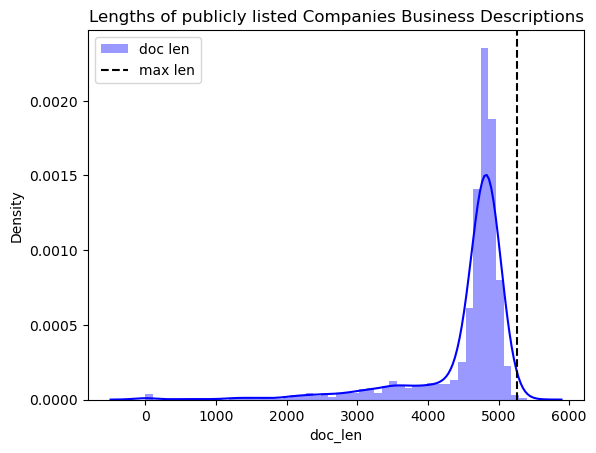

In [4]:
df_public['doc_len'] = df_public['Business Section Clean'].apply(lambda words: len(words.split()))
max_seq_len = np.round(df_public['doc_len'].mean() + df_public['doc_len'].std()).astype(int)
sns.distplot(df_public['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Lengths of publicly listed Companies Business Descriptions'); plt.legend()
plt.savefig('Lengths of publicly listed Companies Business Descriptions.pdf')
plt.show()


In [5]:
df_private = pd.read_csv('Copy of For_Simon_G.csv',encoding='latin-1',sep=';')
df_private = df_private.dropna(subset=['Description'])
privates_descriptions = list(df_private['Description'])
privates_names = list(df_private['Company Name'])

/var/folders/j4/2v0hxs8n2ddgxyskrh60j0p00000gn/T/ipykernel_2150/1427898710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_private['doc_len'], hist=True, kde=True, color='b', label='doc len')


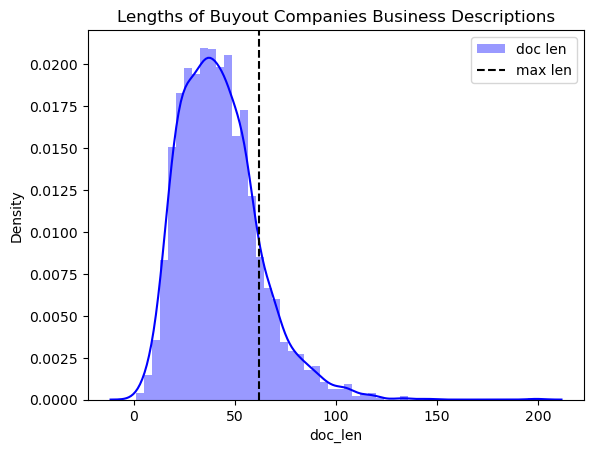

In [6]:
df_private['doc_len'] = df_private['Description'].apply(lambda words: len(words.split()))
max_seq_len = np.round(df_private['doc_len'].mean() + df_private['doc_len'].std()).astype(int)
sns.distplot(df_private['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Lengths of Buyout Companies Business Descriptions'); plt.legend()
plt.savefig('Lengths of Buyout Companies Business Descriptions.pdf')
#plt.savefig('Lengths of Buyout Companies Business Descriptions.png')
plt.show()

In [7]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

corpus_embeddings = embedder.encode(corpus_public, convert_to_tensor=True)


In [8]:
def get_closest_for_single(description, minimum_score):
    query_embedding = embedder.encode(description, convert_to_tensor=True)

    search_hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=50)[0] #Get the hits for the first query

    search_hits = [hit for hit in search_hits if hit['score'] >= minimum_score]
    
    closest_tickers = [tickers[int(hit['corpus_id'])] for hit in search_hits]

    print(f"Closest tickers:")
    print(closest_tickers)
    print()
    
    
    
description = privates_descriptions[0]

get_closest_for_single(description, 0.35)

Closest tickers:
['DFIN']



In [9]:
len(privates_names)

2428

In [10]:
privates_descriptions[0]

'Sabre is a technology solutions provider to the global travel and tourism industry. It offers a broad range of technology solutions including, data-driven business intelligence, mobile, distribution and Software-as-a-Service solutions which are used by travel suppliers (airlines, hotels, car rental outlets, railways, cruise linesand tour operators) and travel buyers (travel agencies, travel management companies and corporate travel departments) to plan, market, sell, serve and operate their business.'

In [1]:
def get_closest(privates_names, privates_descriptions, minimum_score):
    for idx, private_description in enumerate(privates_descriptions):
        query_embedding = embedder.encode(private_description, convert_to_tensor=True)

        search_hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=50)[0] #Get the hits for the first query
        
        search_hits = [hit for hit in search_hits if hit['score'] >= minimum_score]
        
        #tickers_and_scores = [(tickers[int(hit['corpus_id'])], float(hit['score'])) for hit in search_hits]
        tickers_= [tickers[int(hit['corpus_id'])] for hit in search_hits]
        print(f"Closest matches for {privates_names[idx]}:")
        print(tickers_)
        print()
        
get_closest(privates_names, privates_descriptions, 0.35)

NameError: name 'privates_names' is not defined

In [12]:
number_of_private_companies = 10

get_closest(privates_names, privates_descriptions, 0.35)

Closest matches for Sabre:
['DFIN']

Closest matches for SABRELINER CORPATION:
['MCFT', 'MESA', 'AROC']

Closest matches for Sabroe Refrigeration:
[]

Closest matches for Saeco/Saeco International Group?:
['AVO', 'CVGW', 'CHS']

Closest matches for Safe Traffic/ RoadSafe Traffic:
['REKR', 'MTSI', 'FSS', 'DIOD', 'DY']

Closest matches for SafeBoot Holdings, BV:
[]

Closest matches for Safelite Glass Corp.:
['ABG']

Closest matches for SafeRoad:
['BEEM', 'ENS', 'GOEV', 'LSEA', 'ROCK', 'VECO', 'GLRE', 'HSC', 'REKR', 'PLPC', 'IEA', 'CMBM']

Closest matches for Safestore Holdings:
[]

Closest matches for Safety Kleen Europe:
['CSWI', 'PLPC', 'SPSC', 'TEX', 'LXFR', 'ENS', 'TITN', 'WTTR', 'TDS', 'ALKS', 'KWR', 'TISI']

Closest matches for SafeWorks Holdings, Inc.:
['RLGY', 'NWPX', 'LXFR', 'AQUA', 'BOOM', 'GVA', 'ARTNA', 'FSS', 'GWRS', 'NWN', 'AZZ', 'NR', 'TNC', 'VECO', 'HYLN', 'EPAC', 'ENR', 'USLM', 'IIIN']

Closest matches for Safic Alcan:
['SCL', 'UFPT', 'CCF', 'IOSP', 'HWKN', 'FN', 'MTX', 

Closest matches for SARK / Cutty Sark:
[]

Closest matches for SARK / SARK Infotech:
[]

Closest matches for SARquavitae:
['LHCG', 'SBRA', 'CYH']

Closest matches for SAS:
[]

Closest matches for SAS Benda Bili (Sezane):
['DBI', 'GIII', 'RVLV', 'GES', 'SHOO', 'DDS', 'EVER']

Closest matches for SAS Holding:
['ATNI', 'ATSG', 'RLGT', 'TRS', 'THRY']

Closest matches for Sasseur Cayman Holdings Limited:
['SKT', 'ORC', 'TWO']

Closest matches for Sateco:
['MLI', 'ZEUS', 'FORM', 'PLPC', 'MTX', 'AZZ', 'GBX', 'UFPT', 'VECO', 'NWPX', 'KWR', 'FSS', 'KMT', 'NP', 'HWKN', 'IIIN', 'DJCO', 'HLIO', 'CSGS', 'MTRN']

Closest matches for SATI - Sociedad Anonima Tejidos / Sati Grupo:
['MHO', 'LCUT', 'DDS', 'MDC', 'BSET', 'HOFT']

Closest matches for SIA Groupe:
['SIEN']

Closest matches for Sato:
[]

Closest matches for Satyam Computer Services Limited/ Mahindra Satyam:
['CNXN', 'KELYA', 'IESC', 'PLUS', 'RBBN', 'LRN', 'ATNI', 'PAE', 'CCOI']

Closest matches for Saugatuck Capital Co. LP III:
['CSTR', 'CTBI

Closest matches for SDI Media Holdings, Inc. / lyuono-SDI Group:
['AVID', 'HMTV', 'FLNT', 'APPS']

Closest matches for SDL International:
['ETWO']

Closest matches for SDL Leasing (Singapore) Pte Ltd. / Sime Diamond Leasing:
[]

Closest matches for SDL, Inc.:
['EXLS']

Closest matches for SDS:
['ENS', 'BKH']

Closest matches for SDS Business Services:
['IESC', 'ATEN', 'MTSI', 'QLYS', 'CNXN', 'CCOI', 'RBBN', 'DOCN', 'PLUS', 'SMCI', 'ETWO', 'SCWX', 'CASS', 'SMTC', 'ADTN', 'PDFS', 'DY']

Closest matches for Sdu/ Sdu Uitgevers bv:
[]

Closest matches for SÃ© Supermercados:
['EVC']

Closest matches for SEA:
['INSG']

Closest matches for SeaBright Insurance Holdings, Inc.:
['AMSF', 'RLI', 'AMEH', 'RLGT', 'TIG', 'JRVR', 'UVE', 'EIG', 'SIGI', 'UIHC']

Closest matches for Seabulk International:
['WTI', 'HP', 'PARR', 'NWN', 'WTTR', 'OIS', 'MUR', 'HZO', 'ATSG', 'CLNE', 'LBRT']

Closest matches for Seacastle/Interpool:
['MIC', 'SBCF']

Closest matches for SeaChange International, Inc.:
['ECOM']

C

Closest matches for Senoble:
['TITN', 'CAKE', 'CVGW', 'CVGI']

Closest matches for Sensata Technologies:
['THRY', 'REKR', 'TTEK', 'SLAB', 'CEVA', 'SITM', 'FORM', 'LUNA', 'ATOM']

Closest matches for SENSE THERAPEUTIC:
['LCTX', 'OCUL', 'ALEC', 'ARQT', 'PGEN', 'LNTH', 'NRIX', 'ALDX', 'FIXX', 'PTCT', 'PRTA', 'ADVM', 'AVXL', 'EDIT', 'GKOS', 'OPRX', 'FBRX', 'RXDX', 'SAVA', 'CSTL', 'DTIL', 'KOD', 'CRTX', 'ALT', 'ONCT', 'FGEN', 'INFI', 'ASXC', 'AXDX', 'REPL', 'NMTR']

Closest matches for Sensistor:
['SXT', 'FORM']

Closest matches for Sensys Medical:
['THRY', 'KOD']

Closest matches for Sentinel:
['SMCI', 'ATEN', 'CMBM', 'SITM', 'QLYS', 'RMBS', 'MTSI', 'ALKT', 'ETWO', 'SLAB', 'SCWX', 'AVYA', 'REKR']

Closest matches for Senturion:
['VC']

Closest matches for Sequa Corporation:
['ATSG']

Closest matches for Sequana:
['MD', 'PGEN']

Closest matches for Sequel / Sequel Business Solution:
['IESC', 'RBBN', 'DY', 'CCOI', 'HLIT', 'SMTC', 'FLNT', 'MTSI', 'AMWL', 'POLY']

Closest matches for Sequent:


Closest matches for Shriram City Union:
['CHCO', 'CUBI', 'MCB', 'HNI', 'CBNK', 'RILY']

Closest matches for Shuanghui / WH Group:
['HFFG', 'WSFS']

Closest matches for sia Abrasives:
['ABM', 'ZEUS', 'HWKN', 'MLI', 'AZZ', 'CRS', 'AAON', 'DOOR', 'MTRN', 'CCF', 'SCL', 'LCII', 'AOUT', 'PLOW', 'SWBI', 'ROLL', 'FN', 'SRI', 'FSS']

Closest matches for Siaco:
[]

Closest matches for Siat:
['FN', 'LCII', 'MLI', 'UFPT', 'AIN', 'GEF', 'MRC', 'VRS', 'VECO', 'FSS', 'DIOD', 'HAYN', 'MTSI', 'NP', 'PTSI', 'AGTI', 'CSWI', 'CCF', 'MWA', 'SMTC', 'TG', 'ONTO', 'ALG', 'FORM', 'VPG', 'ALTG', 'UVV', 'AMKR', 'MLR', 'VSH', 'UNFI', 'AIMC', 'CVGI', 'KOPN', 'ARCB', 'TITN', 'FLXS', 'OTTR', 'XENT', 'ZEUS', 'TCS', 'WERN']

Closest matches for SiC Processing:
['SCHN', 'FSS', 'CWST', 'AMKR', 'HCCI', 'AXTI', 'LXFR']

Closest matches for Sicame:
['SMTC', 'MTSI', 'DIOD', 'MYRG', 'PLPC', 'LCII', 'AGTI']

Closest matches for Sichuan Tomorrow:
['EPC', 'CSWI', 'MLI', 'KWR', 'MTX', 'HWKN', 'FSS', 'MDC']

Closest matches for S

Closest matches for Sisal(Flutter Entertainment):
['GAN', 'EBET']

Closest matches for Sita:
['CHEF', 'LCUT', 'THS', 'CNXN', 'DDS', 'TWNK', 'SHOO']

Closest matches for Siteco Lighting GmbH (Signal)/Siteco Beleuchtungstechnik (Osram):
[]

Closest matches for Sitecore:
['AVID', 'DSP', 'FROG', 'TTGT', 'DOCN', 'ETWO']

Closest matches for Siteimprove A/S:
['DOCN', 'PD', 'APPF', 'DSP', 'DOMO', 'DFIN', 'CTLP', 'QLYS', 'PRGS', 'AVYA', 'FROG', 'ATEN', 'UPLD', 'PRO', 'CSGS', 'OSPN', 'POLY', 'ONTO', 'APPN']

Closest matches for Sitel/ SiTel Semiconductor:
['MTSI', 'SMTC', 'CMBM', 'UFPT', 'AGTI', 'DY', 'FN', 'RBBN', 'OOMA', 'CEVA', 'VCRA']

Closest matches for SiteOne Landscape Supply:
['NR', 'LNN', 'APR', 'LSEA', 'SRI', 'SITC', 'LNDC', 'FSS', 'NMRK', 'HYFM', 'MTX']

Closest matches for Sitespect:
['ONTF', 'PD', 'AMWL', 'TTGT', 'SCWX', 'DSP', 'QLYS', 'UPLD', 'GAN', 'DOCN', 'APPS', 'CTLP', 'FLGT', 'ALRM', 'SLAB', 'PRO', 'QTWO', 'REKR', 'PRFT', 'EGAN', 'NTCT', 'EXLS', 'OSPN', 'MAX', 'ECOM', 'ETWO'

Closest matches for Smiths Flour Mills:
[]

Closest matches for Smitty's:
['CHEF']

Closest matches for Smokey Bones Bar and Fire Grill :
['TXRH']

Closest matches for Smollensky's:
['NDLS']

Closest matches for SMS:
[]

Closest matches for SMTC Corporation:
['FN', 'MTSI', 'UFPT', 'AMKR', 'ATCX', 'LCII', 'PDFS', 'AGTI', 'MRC', 'AIMC', 'SMTC', 'EME', 'TISI', 'VECO', 'DY', 'ENR', 'FSS', 'CVGI', 'SMP', 'ETWO', 'CNDT', 'CCF', 'HWKN', 'FIX', 'EPAC', 'SRDX', 'KOPN', 'MLI', 'DAKT']

Closest matches for Smulders:
['EME', 'TPIC', 'NWPX', 'PLPC', 'ROLL', 'GVA', 'ROAD', 'MYRG', 'MLI', 'MTSI', 'IEA', 'KAMN', 'NNBR', 'DY', 'MDC', 'SMTC', 'NBR', 'LNN', 'ATNI', 'HWKN', 'TITN', 'TPC', 'MTX', 'BTU']

Closest matches for Snaam:
['MLI', 'IIIN', 'CRS', 'MTRN', 'DOOR', 'SUM', 'ZEUS', 'PLPC', 'KMT', 'ROLL']

Closest matches for SNAI:
['GAN', 'EBET', 'EVRI', 'CRSR', 'MTSI', 'PLPC', 'CTLP', 'IESC', 'TDS', 'HLIT', 'LRN']

Closest matches for Snap Fitness, Inc.:
[]

Closest matches for Snaplogic Inc:
['QLYS', '

Closest matches for Sopherion Therapeutics:
['PRLD', 'RXDX', 'CRDF', 'RAPT', 'TPTX', 'CTMX', 'CGEM', 'RCUS', 'VSTM', 'LGND', 'RVMD', 'REPL', 'SEEL', 'RLAY', 'ONCT', 'VNDA', 'BCAB', 'ATNX', 'NKTX', 'AGEN', 'IMGN', 'PGEN', 'STRO', 'BPMC', 'MGNX', 'ALXO', 'LCTX', 'ARQT', 'FGEN', 'GRTS', 'ANGO', 'PSNL', 'ARVN', 'KALV', 'SYRS', 'ACRS', 'HRTX', 'INFI']

Closest matches for Sophia Group NV:
['CSV']

Closest matches for Sophiris Bio:
['PTGX', 'SGTX', 'INFI', 'VIRX', 'IBIO', 'LNTH', 'TBPH', 'TGTX', 'BPMC', 'ETNB', 'CHRS', 'SNSE', 'AGEN', 'RUBY', 'ANAB', 'PRTA', 'SBTX', 'KRYS', 'PGNY', 'ARQT', 'BDSX', 'CTXR', 'RCUS', 'PGEN', 'MDGL', 'CLDX', 'URGN', 'HGEN', 'NRIX', 'REPL', 'CLVS', 'ARVN']

Closest matches for SOPHIS:
['SCWX', 'QLYS', 'EPAY', 'ATEN', 'SNEX', 'AMWL', 'ETWO', 'OSPN', 'SMCI', 'REKR', 'ENVA', 'MODN']

Closest matches for Sophos:
['CSGS', 'UIS', 'OSPN', 'AVYA', 'SONO', 'RBBN', 'MGI', 'TDS', 'INSG', 'BALY']

Closest matches for Sorenson Communications:
['SMTC', 'FLNT', 'MTSI', 'POLY', '

Closest matches for Spie Batignolles:
['IESC', 'DY', 'EME', 'STRL', 'MYRG', 'ROAD', 'GVA', 'IEA', 'SUM', 'NMRK', 'NWPX', 'TPC', 'PLPC', 'SMTC', 'MTSI', 'HUBG']

Closest matches for SPIG:
['MLI', 'THR', 'CSWI', 'THRM', 'VPG', 'MTSI', 'FSS', 'SMTC', 'ZEUS', 'FIX', 'MRC', 'SRI']

Closest matches for Spigit, Inc.:
['ETWO', 'DOCN', 'PD', 'ALRM', 'AVID', 'OOMA', 'SCWX', 'QLYS', 'UPLD', 'PRO', 'TTGT', 'ZUO', 'PDFS', 'FROG', 'CTLP', 'REKR', 'APPN', 'WK', 'RMBS', 'AMWL', 'MDRX', 'DSP', 'ATEN', 'ONTF', 'SMCI', 'LSCC', 'SDGR', 'MODN', 'ENVA', 'DAKT', 'PRGS', 'QUOT', 'PING', 'NTCT', 'DOMO', 'APPS', 'CNDT', 'BRC', 'EGAN', 'ALKT']

Closest matches for SPII:
['GBX', 'MLI']

Closest matches for Spinecore, Inc.:
['NUVA', 'SPNE']

Closest matches for Spinewave, Inc.:
['NUVA', 'SPNE', 'ATHX', 'PGEN', 'MEDP', 'TTGT', 'UTMD', 'UFPT']

Closest matches for Spinrite II:
['SENEA', 'DBI', 'SWBI', 'IMKTA', 'DDS', 'LCUT', 'JOUT', 'SHOO', 'WWW']

Closest matches for Spinway:
['ADTN', 'CCOI']

Closest matches for S

Closest matches for Stanton:
[]

Closest matches for Staples.Com:
['IMKTA', 'IESC', 'ECOM']

Closest matches for Star Energy:
['WTI', 'RES']

Closest matches for STAR FOODS:
['TR', 'JJSF', 'UTZ', 'THS', 'ZYXI']

Closest matches for Star Tribune Media Co:
['DJCO']

Closest matches for Star's Service:
['JBT', 'WBT', 'PBI', 'CHEF', 'THS', 'SHYF']

Closest matches for Star21 Networks:
['CCOI', 'SHEN', 'ADTN', 'DY', 'MHLD']

Closest matches for Star2Star Communications:
['AVYA', 'OOMA', 'ATEN', 'CNXN', 'UPLD', 'DOCN', 'ETWO', 'VCRA', 'MTSI', 'POLY', 'VG', 'RLGT', 'CMBM', 'QLYS', 'CTLP', 'CNDT', 'DOMO', 'ZUO', 'ATNI', 'ECOM', 'SMTC', 'FLNT', 'CNSL', 'SMCI', 'OSPN', 'UIS', 'IDT']

Closest matches for Starbev:
['ALTO']

Closest matches for STARHOME:
['SMCI', 'CCOI', 'CMBM', 'RGP', 'PRFT', 'ATEN', 'LSCC']

Closest matches for StarMedia Network, Inc.:
['MDP', 'CCOI', 'IESC']

Closest matches for Starpoint:
['RDNT', 'CYH', 'MD', 'AMEH']

Closest matches for Startronics (AEMS):
['MTSI', 'SMTC', 'F

Closest matches for STP/ STP Informationstechnologie:
[]

Closest matches for StrÃ¥lfors 2:
['MTSI', 'IESC', 'ETWO', 'CNSL', 'SMTC', 'AVYA']

Closest matches for Strand Lighting:
[]

Closest matches for Stratacom:
['MTSI', 'IESC', 'AGTI', 'SMTC']

Closest matches for Stratagene:
['UFPT']

Closest matches for Strategic Industries:
['ATSG', 'FN', 'ALGT', 'TEX', 'TRNS', 'CVLG', 'ATCX', 'DY', 'REKR', 'IEA', 'PRIM', 'HUBG']

Closest matches for Strategic Insight (fka Asset International):
['VRTS', 'MC', 'SNEX', 'STEP', 'MAXR', 'AAT', 'ALKT', 'WETF']

Closest matches for Strategic Mapping:
['REKR', 'CEVA', 'MTSI']

Closest matches for Strategic Partners/ Strategic Office Partner:
['KFRC']

Closest matches for Stratford School:
[]

Closest matches for Stratose:
['AGTI', 'EBS', 'UFPT', 'AMSF', 'UTMD']

Closest matches for Strauss Innovation:
['DDS', 'IMKTA', 'CNXN']

Closest matches for Strayer Education :
['STRA', 'APEI']

Closest matches for Strayfield:
['THR', 'TITN', 'SOI', 'MOD', 'WBT', '

Closest matches for SupplyFORCE:
['MYRG', 'EME', 'DY', 'AGTI', 'LCII', 'FIX', 'MLI', 'TISI', 'MRC', 'MTSI', 'ROLL']

Closest matches for Supra:
[]

Closest matches for Sur La Table:
['LCUT']

Closest matches for Sure Maintenance:
['DY', 'PLPC', 'MYRG']

Closest matches for Surebridge, Inc.:
['NTCT', 'SCWX', 'ETWO', 'PAE', 'IESC', 'LRN', 'ATNI', 'CNXN', 'TISI', 'APG', 'ALRM', 'CMBM', 'PRGS', 'AMN', 'PRFT', 'PRO']

Closest matches for Surepoint Holdings, Inc.:
['AROC', 'MRC', 'MLI', 'TITN', 'FIX', 'LCII', 'MLR', 'AIMC', 'MTSI', 'APPS']

Closest matches for Surgical Care Affiliates:
['CYH', 'SGRY', 'AMEH']

Closest matches for Surgical Info Systems:
['SGRY', 'AGTI', 'CASS', 'CSII', 'CYH']

Closest matches for Surgis:
['SRDX', 'HNGR', 'STAA']

Closest matches for Surpass/ Surpass Medical:
['SRDX']

Closest matches for Survey Sampling International Holdings:
['RSI']

Closest matches for Survitec Group (Cayman Islands) Limited:
['MLR', 'AOUT', 'OII', 'SAFT', 'UFPT']

Closest matches for SuSE

Closest matches for SystemsNet Group, Inc.:
['RBBN', 'ATNI', 'IESC', 'CASS', 'PRGS', 'EPAC', 'EXLS', 'AVAV']

Closest matches for Systinet Corporation:
['CCOI', 'ENV']

Closest matches for Syswin:
['NMRK', 'MDC', 'WD', 'EXPI']

Closest matches for Syte Information Technology:
['TTGT', 'ECOM', 'YEXT', 'RVLV', 'CATO', 'PRO', 'QUOT', 'REKR']

Closest matches for Sytner Group:
['LOTZ']

Closest matches for T J Hughes:
['DDS', 'LCUT', 'KIRK', 'IMKTA', 'AOUT']

Closest matches for T-3/ T3 Media:
['DOCN', 'VG']

Closest matches for T-Star:
['TTEK', 'MLI', 'TRNS', 'TRS', 'TPIC', 'DY']

Closest matches for T-System:
['TCMD', 'TLIS']

Closest matches for T.G.I. Friday's:
[]

Closest matches for T.O. Holdings LLC ( Titan Outdoors):
[]

Closest matches for T&F Informa LLP/taylor & Francis:
[]

Closest matches for T4media:
[]

Closest matches for Tabi International:
['DBI']

Closest matches for Table Talk Pies, Inc.:
[]

Closest matches for TAC Bancshares, Inc.:
['CUBI', 'HBCP', 'HMST', 'GBCI', 'FF

Closest matches for TEGEE CHEMIE:
['HWKN', 'CCF', 'SCL', 'HCCI', 'CSWI', 'GTLS', 'IOSP', 'FSS', 'WTTR', 'MTX', 'KWR', 'TNC', 'ROLL', 'SLCA']

Closest matches for TEGSCO/ AutoReturn:
['MLR', 'PLOW', 'HUBG', 'SOI']

Closest matches for Tekni-Plex:
['TEX', 'PLXS', 'TTEK', 'HAYN', 'NX', 'PGEN', 'VREX', 'NP']

Closest matches for Teknon/Centro MÃ©dico Teknon:
['CYH', 'MD', 'AGTI', 'AMEH', 'INFU', 'IVC', 'UFPT', 'RDNT', 'CDNA', 'NHC']

Closest matches for Teksid Aluminum:
['HAYN', 'TTEK']

Closest matches for TELCAST/Telcast Media Group:
[]

Closest matches for Telcordia Holdings, Inc.:
['TDS', 'DY', 'LILA']

Closest matches for Telcove:
['CCOI', 'ADTN', 'CNXN', 'DY', 'MTSI', 'IESC', 'TDS', 'SHEN', 'RBBN', 'SMTC', 'TCX', 'NTCT', 'CMBM', 'MYRG']

Closest matches for TEL DA FAX:
['SHEN', 'CCOI', 'RBBN', 'ADTN', 'CNXN', 'DY']

Closest matches for Tele-Media :
['CCOI', 'HLIT', 'CMBM', 'WOW']

Closest matches for Telebit Corporation :
['HAYN', 'SMTC']

Closest matches for TeleCity Group plc 13:
[

Closest matches for The ComplEAT Food Group II:
['CHEF', 'JJSF', 'THS']

Closest matches for The Container Store, Inc.:
['TCS', 'UNFI', 'CVGI', 'CONN', 'MLR', 'THS', 'GEF', 'IMKTA', 'TRTN', 'DDS']

Closest matches for The Continuum Company:
[]

Closest matches for The Covenant Group, Inc.:
['SIGI']

Closest matches for The Diamond Center:
[]

Closest matches for The Directional Drilling Company:
['LBRT', 'BBCP']

Closest matches for The Dwyer Group:
['HLIO', 'MLI', 'ONTO', 'DIOD', 'FN', 'SOI', 'AIMC', 'VPG', 'MTSI', 'SMTC', 'GTLS', 'SITM', 'REKR', 'EPAC', 'VSH', 'OUST', 'CSWI', 'MRC', 'AGTI', 'VECO']

Closest matches for The Employment Group:
['BRP']

Closest matches for The Engine Group, Ltd:
['REVG']

Closest matches for The European Candy Group:
['GIII', 'JJSF']

Closest matches for The Faucet Queens, Inc.:
['LCUT', 'AOUT', 'LCII', 'APR', 'BSET', 'UFPT', 'MTSI']

Closest matches for The FeedRoom:
['HLIT', 'AVID']

Closest matches for The Foundry :
['SCU', 'LSCC', 'UIS', 'CSGS', 'AMW

Closest matches for Tilney BestInvest:
['STEP', 'SNEX', 'MC', 'AMK', 'VRTS', 'PJT', 'RILY', 'BRP', 'FFWM']

Closest matches for Tim Hellas Telecommunications S.A:
['TDS', 'ADTN', 'SHEN', 'TCX']

Closest matches for Time Warner/Fanch Joint Venture II:
['HLIT', 'CTLP', 'FUBO', 'CNXN']

Closest matches for Times Publishing Company:
['GCI', 'ATNI']

Closest matches for Timothy's World Coffee:
[]

Closest matches for Tinnerman Palnut:
['IIIN', 'JJSF', 'MLI', 'ZEUS']

Closest matches for Tinopolis Ltd:
['IESC']

Closest matches for TINSA:
['NMRK', 'EXPI', 'STEP', 'SNEX', 'IESC', 'GNL', 'ALRM']

Closest matches for Tiphook Rail:
['OII', 'MATX']

Closest matches for Tipico:
['GAN', 'EBET', 'GNOG', 'RSI', 'BALY']

Closest matches for Tippmann Sports, LLC:
['AOUT']

Closest matches for Tire Rack:
['DORM', 'SMP', 'TRNS', 'LCII', 'SRI']

Closest matches for Titan Energy (Cornerstone):
['TITN', 'ENS', 'ENR', 'MGEE', 'SPWR', 'WTTR', 'CVI']

Closest matches for Titan Petrochemicals Group Limited:
['T

Closest matches for Tradimus:
[]

Closest matches for Trados, Inc.:
['TROX']

Closest matches for Tragus:
['TXRH', 'APLE']

Closest matches for Trainline:
[]

Closest matches for TRAK Communications, Inc.:
['MTSI', 'FIX', 'VSH', 'SMTC', 'CMBM', 'FN', 'UFPT', 'EMKR', 'FELE', 'LSCC', 'KOPN', 'SMCI']

Closest matches for TralinPak:
[]

Closest matches for TRANS HEALTHCARE INC:
['TRNS', 'AMN', 'AMWL', 'AGTI', 'CYH', 'PBH', 'VCRA', 'ADTN']

Closest matches for Trans Maldivian Airways:
['HA', 'ATSG', 'ALGT']

Closest matches for Trans World Entertainment:
[]

Closest matches for TRANS-O-FLEX:
['MRC']

Closest matches for Transact:
['TWOU', 'LRN', 'NTCT', 'SCWX']

Closest matches for Transamerican Energy:
['WTI', 'FF', 'WTTR', 'HFFG', 'NOG']

Closest matches for Transcept Pharmaceuticals (fka Novacea):
['BHVN', 'PTCT', 'CLDX', 'AXSM', 'CERE', 'STIM', 'VNDA']

Closest matches for TransCore Holdings, Inc.:
['PRG', 'TDS', 'DY', 'USM', 'IDCC']

Closest matches for Transcraft Corporation:
['WKHS',

Closest matches for TriMark USA Corp.:
['LCUT', 'WBT', 'CNXN', 'CHEF', 'SPSC', 'PTVE', 'APR', 'LCII', 'CONN', 'IMKTA', 'IESC', 'ADV', 'ETWO']

Closest matches for Trimas Corp:
['TRS', 'MLI', 'UFPT', 'KAMN', 'SIEN', 'SRI', 'TRNS', 'PRIM', 'FSS', 'AMKR', 'CCF', 'CRSR', 'STAA', 'CRS', 'TDS', 'PLPC', 'PTVE', 'AGTI', 'LCII', 'TPIC', 'ATSG', 'NPK', 'MTSI', 'SKIN', 'WING', 'KOPN', 'CONN', 'HSTM']

Closest matches for Trimco:
['DBI', 'GIII', 'ACCO', 'WWW', 'AOUT', 'UFPT', 'FIZZ', 'ROLL', 'GES', 'WW', 'PING', 'CARS', 'ENR', 'TWNK']

Closest matches for TRINET/Trico:
['TNET', 'ENV', 'TSC', 'ADTN', 'RLI', 'DFIN']

Closest matches for Trinethra:
['IMKTA']

Closest matches for TRINITY:
['TRN']

Closest matches for Trinity Consultants:
['TRN']

Closest matches for Trinity Hospice, Inc.:
['CSV', 'LHCG', 'CYH']

Closest matches for Trinity Watthana:
['TRN', 'TSC', 'MTX', 'MMI']

Closest matches for Trinseo (Formerly Styron):
['TSE', 'VRS', 'TROX', 'HAYN', 'GTLS', 'OTTR', 'THR', 'TG', 'SRI', 'COKE', 'S

Closest matches for Twinco-Romax, LLC:
['SMP', 'DORM', 'MPAA', 'LCII', 'SRI', 'CSWI', 'ABG', 'KWR']

Closest matches for TWITCHELL:
['UFPT', 'AIN', 'FN', 'AIMC', 'MTSI', 'ROLL', 'LCII', 'POLY', 'SCL', 'MLI', 'CVGI', 'CCF', 'ZEUS', 'CRS', 'PLPC', 'UFI', 'IIIN', 'SWBI', 'SMTC', 'AXL', 'KAMN', 'NWPX', 'VECO', 'MTRN', 'PGTI', 'BCC', 'MTX', 'HWKN', 'DOOR', 'SRI', 'AMKR', 'ONTO', 'UFPI']

Closest matches for Two - Way TV Ltd.:
[]

Closest matches for TWOeTWO (2e2):
['IESC', 'CNXN', 'ATEN', 'QLYS', 'CCOI', 'SCWX', 'RBBN', 'PLUS', 'ATNI', 'NTCT', 'MTSI', 'KELYA', 'MANT', 'DOMO', 'ACIW']

Closest matches for TWR Group Ltd:
['FN', 'LCII', 'MLR', 'KOPN', 'EMKR', 'FSS', 'MTSI', 'SOI', 'KN']

Closest matches for TXU Energy:
['MGEE', 'SPWR']

Closest matches for Tyco International Group:
['SCWX', 'AOUT']

Closest matches for Tygris/Everbank:
['MCB', 'CUBI', 'PIPR', 'CASH', 'MVBF', 'MOFG', 'NMRK', 'GBCI', 'HBNC', 'SNEX', 'MTX', 'HUBG', 'RLGT', 'CSTR', 'ANDE', 'BKU', 'ENVA', 'OCFC', 'DFIN', 'CASS', 'M

Closest matches for Uniroyal Goodrich:
['OIS', 'SMED', 'WWW', 'UVV', 'MUR', 'UFPT']

Closest matches for UniSite, Inc.:
['CMBM']

Closest matches for Unison:
['MANT']

Closest matches for Unisource:
['FN', 'UFPT', 'SMTC', 'AGTI', 'MTSI', 'AMKR', 'LCII', 'DIOD', 'ENR', 'AOUT', 'UNFI', 'THS', 'EBF', 'NP', 'TR', 'SHOO', 'IMKTA', 'ALTG', 'STFC', 'RCEL', 'CTOS', 'LCUT']

Closest matches for Unisteel:
['ROLL', 'UFPT', 'FN', 'MTSI', 'TPIC', 'MLI', 'VPG', 'KAMN', 'AIMC', 'VSH', 'SRI', 'SMTC', 'DIOD', 'DORM', 'ZEUS', 'LCII', 'TRNS', 'AIN', 'CRS', 'SITM', 'PLPC', 'CSWI', 'VECO', 'CCF', 'AGTI', 'TRS', 'MTRN', 'PGEN', 'EME', 'KMT', 'TTMI', 'REKR', 'MTX', 'TEX', 'LXFR', 'DY']

Closest matches for UNIT4:
['BL']

Closest matches for United Artists:
[]

Closest matches for United Asset Coverage:
['DY', 'MTSI', 'PLPC', 'MYRG', 'CUBI', 'SRI', 'POLY', 'IESC']

Closest matches for United Biscuits:
['TR', 'SMPL', 'JJSF']

Closest matches for United Cape Cod Cranberry, L.P.:
['ALTO', 'THS']

Closest matches

Closest matches for US Power Generating :
['YORW', 'ORA', 'NOG', 'CPK', 'NWN', 'MGEE', 'BKH', 'GWRS', 'SPWR', 'NWE', 'PUMP', 'RYI', 'PARR', 'ARTNA', 'SHEN']

Closest matches for US Radio:
['RRR']

Closest matches for US Renal Care, Inc.:
['OM', 'CYH']

Closest matches for US Shipping:
['TRTN', 'WTTR', 'GNK', 'MRC', 'SOI', 'HWKN', 'GTLS', 'CVLG', 'NKLA', 'MRTN', 'PUMP', 'ANDE', 'ATSG']

Closest matches for US Synthetic:
['MLI', 'POLY']

Closest matches for US UNWIRED:
['SHEN', 'USM', 'WOW']

Closest matches for USA Capital Holdings:
['GBL', 'UCBI', 'UBSI', 'AAT', 'BRMK', 'ABM', 'COOP']

Closest matches for USBid :
['SMTC', 'MTSI', 'AMKR', 'FN', 'LCII', 'PDFS', 'VSH', 'VECO', 'DIOD', 'UFPT', 'POWI', 'SRI', 'AXTI', 'POWW', 'SMP', 'KOPN', 'ABG', 'AIMC', 'CVGI', 'ATOM', 'NP', 'MLI', 'DY', 'CCF', 'ETWO']

Closest matches for USC:
[]

Closest matches for USG CORPORATION:
['OFG', 'CVGI', 'UNFI', 'NWPX', 'TNC', 'GMS', 'GIII', 'CVCO', 'GTLS', 'JELD', 'MDC', 'WDFC', 'HNI', 'SWBI', 'ROLL', 'IMKTA'

Closest matches for VAT:
['MRC', 'MLI', 'ATRI', 'FN', 'UFPT', 'AGTI', 'AVD', 'BOOM', 'EPAC', 'GTLS', 'CVGI', 'MTSI', 'FORM', 'PRG']

Closest matches for Vatterott:
[]

Closest matches for VAULTUS:
['ATEN', 'DOCN', 'ETWO', 'QLYS', 'MTSI', 'UPLD', 'AMWL', 'SCWX', 'OOMA', 'VCRA', 'CTLP', 'ALRM', 'SMCI', 'LSCC', 'IESC', 'OSPN', 'SMTC', 'AVYA', 'CMBM', 'NTCT', 'APPN', 'VG']

Closest matches for Vcampus Second Investment:
['LRN', 'TWOU', 'IESC', 'ECOM', 'RBBN', 'PAE']

Closest matches for VCustomer Corporation:
['PAE', 'CNDT', 'EVOP', 'MTX', 'ECOM', 'LRN', 'WTTR']

Closest matches for VDM/ VDM Industries:
['CVGI', 'CVCO', 'AXL', 'UFPT', 'MRC', 'VBIV', 'MYE', 'BOOM', 'VNDA', 'VRA', 'CCF', 'OTTR', 'GIII', 'MLI', 'CSWI', 'JJSF']

Closest matches for VDP:
['VBTX', 'MVBF']

Closest matches for Vector/ Vector Laboratories:
['LNTH', 'IMUX', 'LGND', 'CDMO', 'OSUR', 'BDSX', 'PLSE', 'ACRS', 'QTRX', 'MLAB', 'NEOG', 'CUE', 'RCUS', 'RAPT', 'PGEN', 'STRO', 'ANAB', 'LABP', 'IMGN', 'SNSE', 'FDMT', 'MCRB', '

Closest matches for Vetco Gray:
['HP', 'WTI', 'SOI', 'MRC', 'PTEN', 'OIS', 'PLPC', 'LBRT', 'TPIC', 'AIMC', 'MTX', 'MLI', 'IESC', 'EME', 'WTTR', 'AVID', 'GTLS', 'SUM', 'TISI', 'NWPX', 'HWKN', 'PRIM', 'EPAC', 'MUR', 'UFPT', 'SMTC', 'MTSI', 'FN', 'MLR']

Closest matches for VetCor:
['PETS', 'PETQ', 'GBCI', 'CYH', 'TRUP', 'MD', 'AGTI', 'CENT']

Closest matches for Veterinary Centers of America:
[]

Closest matches for Vetoquinol:
['PETS', 'PRAA', 'DFIN', 'PETQ']

Closest matches for VÃ©toquinol:
['PETS', 'PRAA', 'DFIN', 'PETQ']

Closest matches for Vets First Choice:
['CVET', 'VMD', 'VEC']

Closest matches for Vetus:
['MCFT', 'HZO', 'FELE']

Closest matches for VETXX:
['PETS', 'TRUP', 'CENT', 'PETQ', 'SHOO', 'UFPT', 'AOUT', 'LCUT']

Closest matches for VHA Long Term Care:
['LHCG', 'LTC', 'CYH', 'APR', 'HR', 'AMN', 'AMWL', 'GMRE']

Closest matches for VIA:
['IESC', 'AMWD', 'HOFT', 'BSET']

Closest matches for Via Location:
['MLR', 'REVG', 'CARS', 'GBX', 'KAR', 'ATSG', 'MGRC', 'ABG', 'HUBG',

Closest matches for VisualSoft Technologies Limited:
['BIGC', 'ALRM', 'ECOM', 'OOMA', 'ONTF', 'CTLP', 'DOCN', 'DSP', 'QNST', 'EVOP', 'ADV', 'QLYS', 'PRFT', 'NMRK', 'TTGT', 'SFT', 'SCWX', 'AVYA', 'GOEV', 'PRGS', 'BAND', 'ETWO', 'PI', 'PRO', 'AMK', 'AMWL', 'QUOT', 'SMCI']

Closest matches for Viswas Business Synergies Ltd:
['VSH', 'VC', 'SPSC']

Closest matches for Vitae/ VIM Vitae:
[]

Closest matches for Vital Petfood Group:
['RGP']

Closest matches for Vitale Assistance:
['AMSF', 'TIG', 'MLR', 'UFCS', 'MYRG']

Closest matches for VITALIA:
['CYH', 'AGTI']

Closest matches for Vitalife Partners (Overseas):
['FFWM']

Closest matches for Vitamins:
[]

Closest matches for Viterra:
['MCFT']

Closest matches for Vitex Packaging:
['UFPT', 'AIN', 'FN', 'GEF', 'ONTO', 'AMKR', 'VRS', 'DIOD', 'SMTC', 'MTSI', 'UVV', 'MLI']

Closest matches for vitronet Holding GmbH :
['EAF', 'VC', 'ACLS', 'VSH']

Closest matches for VITS:
['LXFR']

Closest matches for Viva Entertainment, Inc.:
['FUBO', 'DY', 'HLIT

Closest matches for Ward Packaging:
['UFPT', 'FN', 'THS', 'VRS']

Closest matches for Warings Construction:
['EME', 'DY', 'GVA', 'TPC', 'ROAD', 'PLPC', 'NWPX', 'MYRG', 'IESC']

Closest matches for Warn Industries:
['LCII', 'SOI']

Closest matches for Warner Chilcott:
['UFPT', 'USNA', 'HWKN', 'GIII', 'AGTI', 'RCEL', 'TWNK', 'DBI', 'EPC', 'DDS', 'MLI', 'CSWI', 'ZYXI', 'HELE']

Closest matches for Warner Music Group Corp.:
['NCMI', 'KODK', 'GCI', 'IHRT', 'IMAX']

Closest matches for WARRIOR:
['LBRT', 'SOI', 'PUMP', 'PRIM', 'MRC', 'HLX', 'HP', 'FELE', 'WTTR']

Closest matches for WARSAW DIST. PARK:
[]

Closest matches for Warwick:
['HWKN', 'CSWI', 'CCF', 'SLCA', 'CVGI', 'CLW', 'GTLS', 'LCII', 'MYE', 'LNN', 'AXL', 'KWR', 'SCL', 'ROLL', 'RYAM', 'FSS', 'MLI', 'NP', 'WDFC', 'KAMN', 'NWPX', 'MTX', 'HOFT', 'MRC', 'BXC', 'FN', 'FUL', 'OTTR', 'AIN', 'ASIX', 'ODC', 'SRI', 'VRS', 'TNC', 'SIGI', 'MLR']

Closest matches for WASH INV. SVC.    Buyout:
[]

Closest matches for Washtec (California Kliendie

Closest matches for Wencor:
['LAWS', 'ATSG', 'MLR', 'SMP', 'DORM', 'SOI', 'PLOW', 'GIC', 'MNRO', 'TITN']

Closest matches for Wendt:
['PLPC', 'VECO', 'ENR', 'NWPX', 'FELE', 'THR', 'IBP', 'IEA', 'MTSI', 'FIX', 'MTX', 'THRM', 'IESC', 'AXTI', 'NWE', 'ENS', 'BECN', 'AMKR', 'ROCK', 'NWN', 'OTTR', 'ASPN', 'MLI']

Closest matches for Wendy's:
['DENN']

Closest matches for Wendy's First Kitchen:
['DENN']

Closest matches for Wento:
['MGEE', 'NWN', 'NWE', 'STEM', 'ORA', 'IEA', 'PBF', 'CPK']

Closest matches for Wermland Paper:
['UFPT', 'MGPI', 'HWKN', 'SWBI', 'CLW', 'FN', 'IMKTA', 'MTSI', 'PTSI', 'SMTC', 'GEF', 'AIN', 'ENR', 'KODK', 'VRS', 'MYE', 'UVV', 'AOUT', 'THS']

Closest matches for Wernersson Ost:
['CAKE', 'WERN']

Closest matches for Weru:
['DOOR', 'JELD', 'MLI']

Closest matches for WESCO Distribution:
['WCC', 'WSBC', 'TEN', 'CTOS', 'SWBI', 'ESE', 'EME', 'HAYN', 'TITN', 'CSWI', 'INT', 'VECO', 'THR', 'MLR', 'DY', 'ROLL', 'AIMC', 'WBT', 'CVGI', 'FN', 'ALG', 'VC']

Closest matches for WES

Closest matches for Windstream Corp:
['OOMA', 'CMBM', 'TDS', 'ATNI', 'CCOI', 'DY', 'AVYA', 'ADTN', 'USM']

Closest matches for Winebow:
['CHEF', 'FIZZ', 'LCUT', 'WMK', 'ALTO', 'THS', 'IMKTA', 'SHOO']

Closest matches for Winia Mando:
['TITN']

Closest matches for Winkler & Dunnebier:
['SXT', 'VRS', 'FSS', 'DDS', 'THRM', 'MWA']

Closest matches for Winn-Dixie:
['CHEF', 'DDS', 'IMKTA', 'THS', 'AOUT', 'UNFI', 'NGVC', 'LCUT', 'CONN', 'CENT', 'WMK']

Closest matches for WinnCare:
['AGTI', 'APR', 'AHCO', 'FLXS', 'UFPT', 'LCII', 'CYH', 'LHCG', 'LMAT', 'HOFT', 'EPC', 'HNI', 'LCUT', 'BSET']

Closest matches for Winsol:
['JELD', 'DOOR', 'CENX', 'AZZ', 'TG', 'APOG', 'MLI', 'NWPX', 'ALTG', 'ROLL', 'PGTI', 'SKY', 'LCII', 'AXL', 'TILE', 'CVCO', 'MTRN', 'CSWI', 'ABM', 'DIOD', 'ZEUS', 'OI', 'GBX', 'GEF', 'CRS', 'UFI', 'KAMN', 'EPAC', 'IBP', 'CVGI']

Closest matches for Winstar Communications:
['CNXN', 'SHEN', 'CCOI', 'IESC', 'DY', 'RBBN', 'TCX', 'ATNI']

Closest matches for Winters:
['FSS', 'CWST', 'S

Closest matches for X Trade Brokers Maklerski:
['EXPI', 'BGCP', 'WTI', 'FCFS', 'ABTX', 'FFIN', 'CBTX', 'TRTX']

Closest matches for x.hlp:
['TTGT', 'LRN', 'MDRX']

Closest matches for Xacti:
['UFPT', 'DIOD', 'CEVA', 'OUST']

Closest matches for Xafinity:
['TTGT', 'QLYS', 'AMWL', 'ROCK', 'MDRX', 'EXLS', 'HSTM', 'EGAN', 'MPLN']

Closest matches for XANODYNE/ Xanodyne Pharmaceuticals:
['CNX', 'KOD', 'APYX', 'XBIT', 'AVXL', 'XOMA', 'NH']

Closest matches for Xantrex Technology:
['AIMC', 'THR', 'REKR', 'NPK', 'EMKR', 'HLIO', 'UFPT', 'ENS', 'AROC', 'ESE', 'EPAC', 'SOI', 'CARS', 'CECE', 'IOSP', 'TEX', 'ATRI', 'MLI', 'TNC', 'TPIC']

Closest matches for XATA:
['RLGT', 'REKR', 'CASS']

Closest matches for Xcelerate Corp.:
['ECOM', 'IESC', 'SNEX', 'PLUS', 'RBBN', 'NMRK', 'CNXN', 'MTX', 'KELYA', 'RGP', 'BGCP', 'LRN', 'PAE', 'SP', 'EXPI', 'SCWX', 'DLX', 'ACIW', 'PRFT', 'ENV', 'PLPC', 'DFIN', 'STEP', 'AMN', 'EVOP', 'CNDT', 'APG', 'AVYA', 'MTSI']

Closest matches for XcelleNet:
['QLYS', 'SMCI', 'ETWO

Closest matches for Ziff Davis Media, Inc.:
['IESC', 'TTGT', 'MTX', 'CNXN', 'MTSI', 'SMTC', 'ECOM', 'PLUS', 'APPS', 'ATNI', 'QUOT', 'AVID', 'ADV', 'ALRM', 'LRN', 'QNST', 'HLIT', 'ACIW', 'KELYA', 'ETWO', 'ONTF', 'PRFT', 'DOCN', 'SCWX']

Closest matches for Ziggo BV/NV:
['CCOI', 'DY', 'HLIT', 'HMTV', 'MDP', 'ATNI', 'IESC', 'SHEN', 'FUBO']

Closest matches for Zilog:
['MTSI', 'SMTC', 'LSCC', 'ATOM', 'DIOD', 'AMKR', 'AXTI', 'VECO', 'UFPT', 'CEVA', 'VSH', 'FN', 'PDFS', 'LASR', 'SLAB', 'KOPN', 'COHU', 'SRI']

Closest matches for Zincocelere:
['TTMI', 'PCSB', 'MTSI']

Closest matches for Zinio Systems:
['ONTF', 'AMWL', 'DOCN', 'DSP', 'APPS', 'ECOM', 'QUOT', 'CTLP', 'FLNT', 'PD', 'FROG', 'TTGT']

Closest matches for Zitcom:
['ATEN', 'DOCN', 'SMCI', 'QLYS', 'CCOI', 'ETWO', 'IESC', 'CNXN', 'SCWX', 'NTCT', 'CMBM', 'DOMO', 'OOMA', 'RLGT', 'SPSC', 'AVYA']

Closest matches for ZIV/ Ziv Aplicaciones y Tecnologia:
['MTSI', 'FELE', 'BEEM', 'ENS', 'POR', 'POWI', 'SMTC', 'ORA', 'SPWR', 'MYRG', 'IEA', 'EN

In [13]:
from tqdm import tqdm

def get_closest_list(privates_names, privates_descriptions, minimum_score):
    closest_list = []
    
    for idx, private_description in enumerate(tqdm(privates_descriptions)):
        query_embedding = embedder.encode(private_description, convert_to_tensor=True)

        search_hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=50)[0] #Get the hits for the first query
        
        search_hits = [hit for hit in search_hits if hit['score'] >= minimum_score]
        
        #tickers_and_scores = [(tickers[int(hit['corpus_id'])], float(hit['score'])) for hit in search_hits]
        tickers_= [tickers[int(hit['corpus_id'])] for hit in search_hits]
        #print(f"Closest matches for {privates_names[idx]}:")
        #print(tickers_)
        #print()
        closest_list.append(tickers_)
    return closest_list
        
closest_list = get_closest_list(privates_names, privates_descriptions, 0.45)

100%|███████████████████████████████████████| 2428/2428 [00:53<00:00, 44.97it/s]


In [14]:
closest_list_1 = get_closest_list (privates_names, privates_descriptions, 0.4)

100%|███████████████████████████████████████| 2428/2428 [00:52<00:00, 45.87it/s]


In [15]:
import random
#Generate 5 random numbers between 10 and 30
randomlist = [963, 420, 355, 1699, 1370]
print(randomlist)
for elem in randomlist:
    print (elem)
    print(privates_names[elem])
    print(closest_list[elem])

[963, 420, 355, 1699, 1370]
963
Swiss Caps
['UFPT', 'MGPI', 'SWBI']
420
Sipartech S.r.l.
['SHEN', 'CMBM', 'LSCC', 'USM', 'CNSL', 'WOW', 'ATEX', 'DY', 'BEEM', 'LASR', 'CCOI', 'RBBN', 'TCX']
355
Shuanghui / WH Group
['HFFG', 'WSFS']
1699
UnopiÃ¹
['AOUT', 'CENT', 'DOOR', 'ESCA', 'VSTO', 'MLI', 'FLXS', 'JOUT']
1370
Torqeedo GmbH
['FELE', 'ENS', 'AMSC', 'BEEM', 'FIX', 'IEA', 'SOI', 'RIDE']


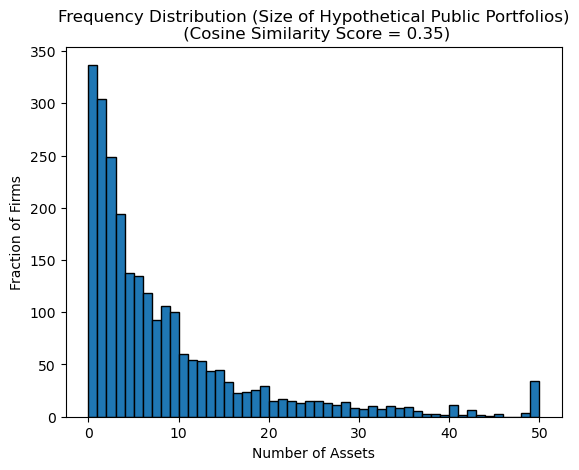

In [16]:
def count_portfolio_lengths(closest_list):
    portfolio_lengths = []
    for portfolio in closest_list:
        portfolio_lengths.append(len(portfolio))
    return portfolio_lengths

def plot_portfolio_lengths(portfolio_lengths):
    plt.hist(portfolio_lengths, bins=50, edgecolor='black')
    plt.xlabel('Number of Assets')
    plt.ylabel('Fraction of Firms')
    plt.title('Frequency Distribution (Size of Hypothetical Public Portfolios)'+'\n'+' (Cosine Similarity Score = 0.35)')
    plt.savefig('Frequency Distribution (Size of Hypothetical Public Portfolios).pdf')
    plt.show()
    
portfolio_lengths = count_portfolio_lengths(closest_list)
plot_portfolio_lengths(portfolio_lengths)


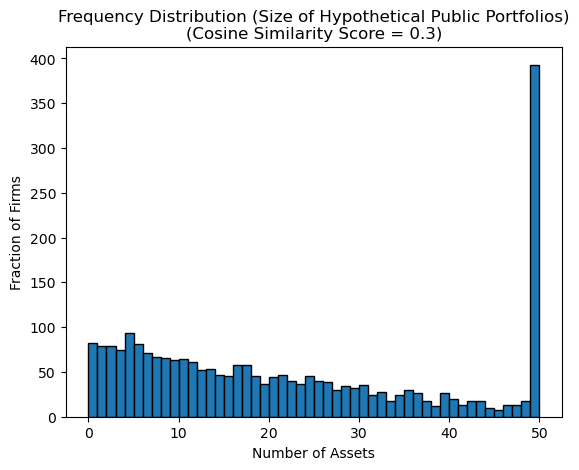

In [17]:
def count_portfolio_lengths_1(closest_list_1):
    portfolio_lengths_1 = []
    for portfolio in closest_list_1:
        portfolio_lengths_1.append(len(portfolio))
    return portfolio_lengths_1

def plot_portfolio_lengths_1(portfolio_lengths_1):
    plt.hist(portfolio_lengths_1, bins=50, edgecolor='black')
    plt.xlabel('Number of Assets')
    plt.ylabel('Fraction of Firms')
    plt.title('Frequency Distribution (Size of Hypothetical Public Portfolios)'+ '\n' + '(Cosine Similarity Score = 0.3)')
    plt.savefig('Frequency Distribution (Size of Hypothetical Public Portfolios)Two.pdf')
    plt.show()
    
portfolio_lengths_1 = count_portfolio_lengths_1(closest_list_1)
plot_portfolio_lengths_1(portfolio_lengths_1)


In [18]:
import pickle
with open('closest_list.pickle', 'wb') as handle:
    pickle.dump(closest_list, handle, protocol=pickle.HIGHEST_PROTOCOL)